Missing Values:
 symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


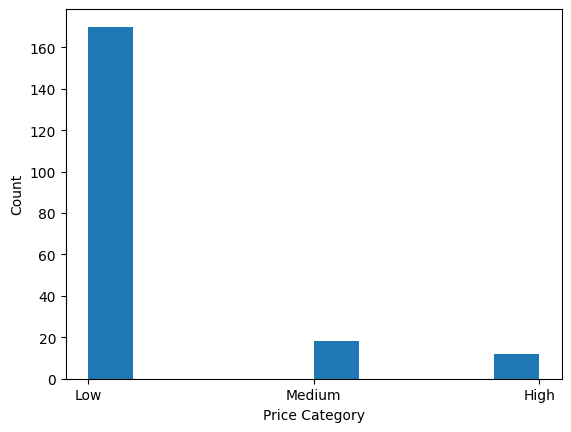

        symboling  wheel-base      length       width      height  \
count  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.830000   98.848000    0.837232    0.915250    0.899523   
std      1.248557    6.038261    0.059333    0.029207    0.040610   
min     -2.000000   86.600000    0.678039    0.837500    0.799331   
25%      0.000000   94.500000    0.800937    0.891319    0.869565   
50%      1.000000   97.000000    0.832292    0.909722    0.904682   
75%      2.000000  102.400000    0.881788    0.926042    0.928512   
max      3.000000  120.900000    1.000000    1.000000    1.000000   

       curb-weight  engine-size  compression-ratio  city-L/100km  highway-mpg  \
count   200.000000   200.000000         200.000000    200.000000   200.000000   
mean   2555.705000   126.860000          10.170100      9.937914    30.705000   
std     518.594552    41.650501           4.014163      2.539415     6.827227   
min    1488.000000    61.000000           7.000000    

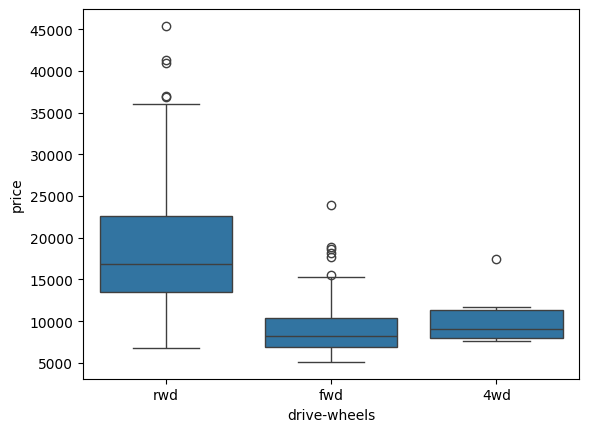

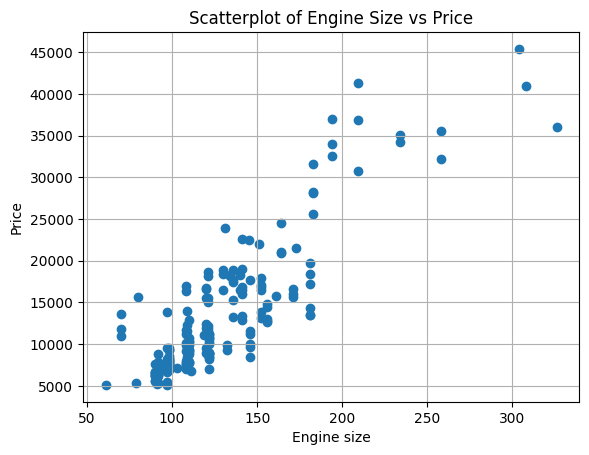

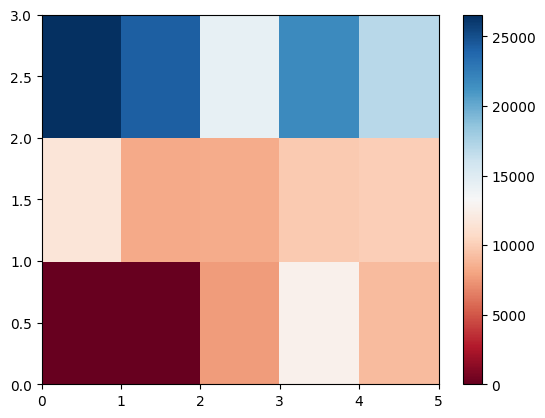

<ipython-input-9-4fcd497d3a21>:92: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_annova.get_group('honda')['price'],
<ipython-input-9-4fcd497d3a21>:93: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_annova.get_group('subaru')['price']


ANOVA Results (Honda vs Subaru): F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


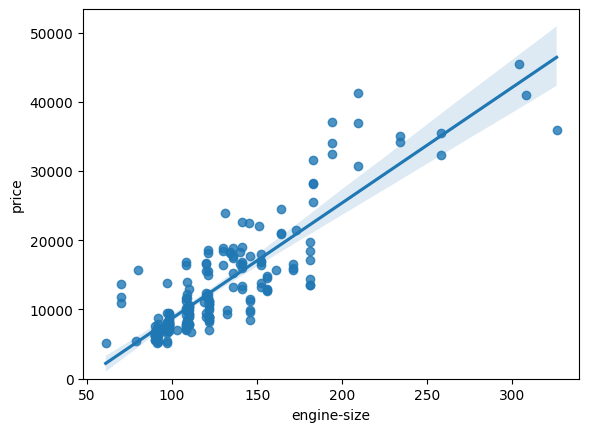

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Using the CSV file
df = pd.read_csv('/output.csv')

# Removing index column
df = df.iloc[:, 1:]

# Assigning column names
headers = ["symboling", "normalized-losses", "make",
           "fuel-type", "aspiration", "num-of-doors",
           "body-style", "drive-wheels", "engine-location",
           "wheel-base", "length", "width", "height", "curb-weight",
           "engine-type", "num-of-cylinders", "engine-size",
           "fuel-system", "bore", "stroke", "compression-ratio",
           "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = headers

data = df.copy()

# Finding and displaying missing values
print("Missing Values:\n", data.isna().sum())

# Replacing '?' with NaN
data.replace('?', np.nan, inplace=True)

# Converting price column to numeric after dropping NaN values
data.dropna(subset=['price'], inplace=True)
data['price'] = data['price'].astype(int)

# Converting 'city-mpg' to L/100km
data['city-mpg'] = 235 / data['city-mpg']
data.rename(columns={'city-mpg': "city-L/100km"}, inplace=True)

# Normalizing length, width, and height
data['length'] = data['length'].astype(float) / data['length'].astype(float).max()
data['width'] = data['width'].astype(float) / data['width'].astype(float).max()
data['height'] = data['height'].astype(float) / data['height'].astype(float).max()

# Binning Price
bins = np.linspace(min(data['price']), max(data['price']), 4)
group_names = ['Low', 'Medium', 'High']
data['price-binned'] = pd.cut(data['price'], bins, labels=group_names, include_lowest=True)

# Histogram for price bins
plt.hist(data['price-binned'].astype(str))
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.show()

# Categorical to numerical variables
fuel_dummies = pd.get_dummies(data['fuel-type'])

# Descriptive analysis
print(data.describe())

# Boxplot
sns.boxplot(x='drive-wheels', y='price', data=data)
plt.show()

# Scatter plot of engine size vs price
plt.scatter(data['engine-size'], data['price'])
plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()

# Grouping Data
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()

# Pivot method
data_pivot = data_grp.pivot(index='drive-wheels', columns='body-style', values='price')

# Filling NaN with 0 in pivot table
data_pivot.fillna(0, inplace=True)

# Heatmap
plt.pcolor(data_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

# ANOVA Test
if 'honda' in data['make'].unique() and 'subaru' in data['make'].unique():
    grouped_annova = data[['make', 'price']].groupby(['make'])
    annova_results = stats.f_oneway(
        grouped_annova.get_group('honda')['price'],
        grouped_annova.get_group('subaru')['price']
    )
    print("ANOVA Results (Honda vs Subaru):", annova_results)

# Correlation using Regression plot
sns.regplot(x='engine-size', y='price', data=data)
plt.ylim(0, )
plt.show()
